In [37]:
# uploading the data set using pandas 
import pandas as pd 
df = pd.read_excel('B:\\heart_disease.xlsx', sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [38]:
# it will show the null values 
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [39]:
# we are filling the null values using mean 
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)

C:\Users\balav\AppData\Local\Temp\ipykernel_16564\3692807013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)


In [40]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [41]:
# it will show all values at one step 
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


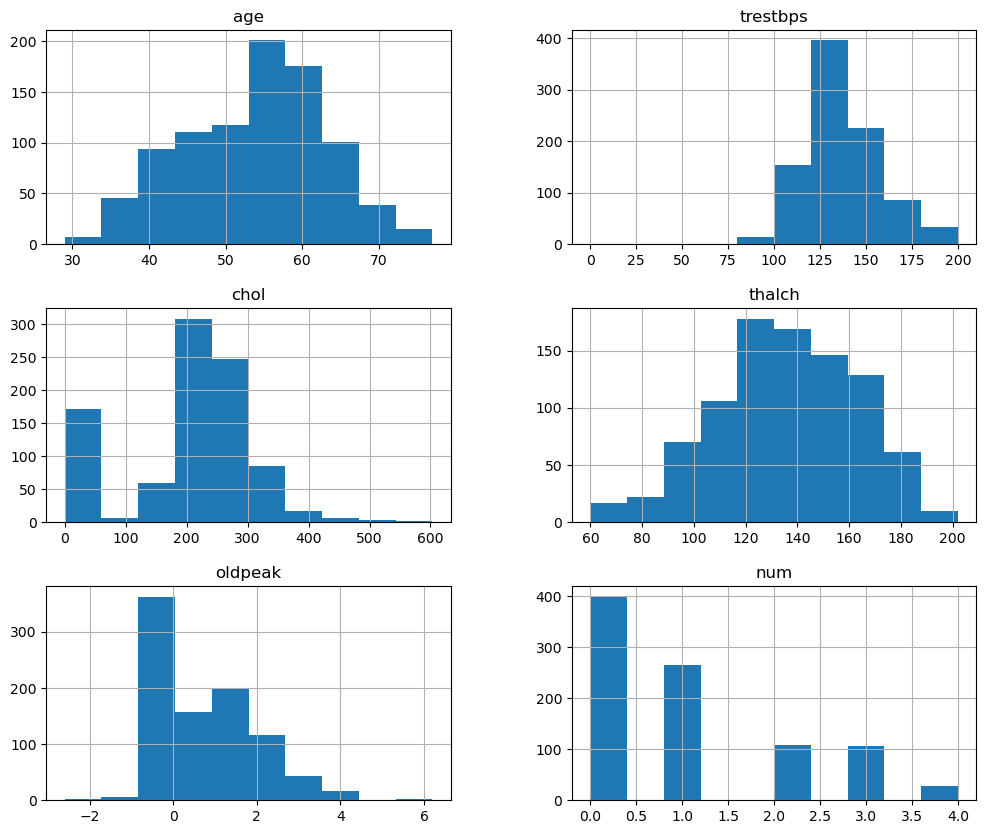

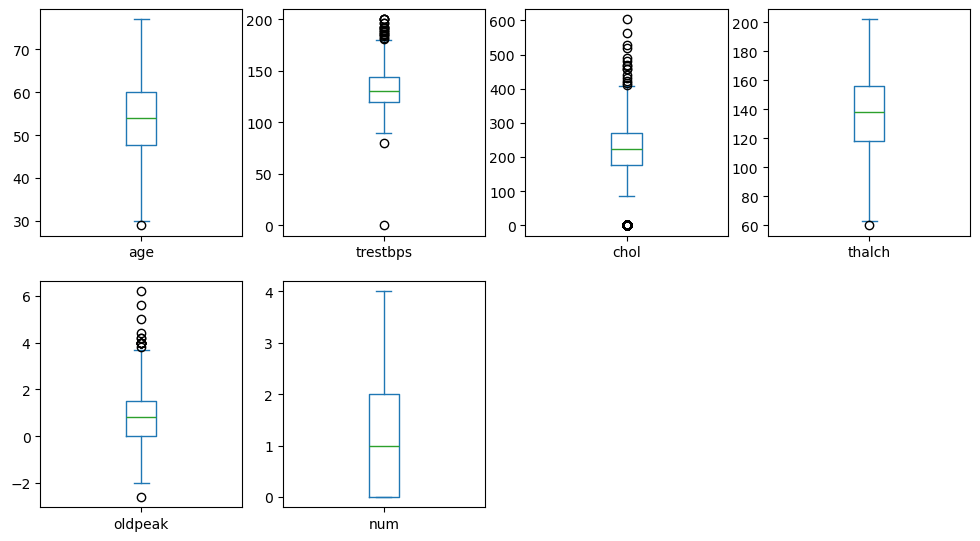

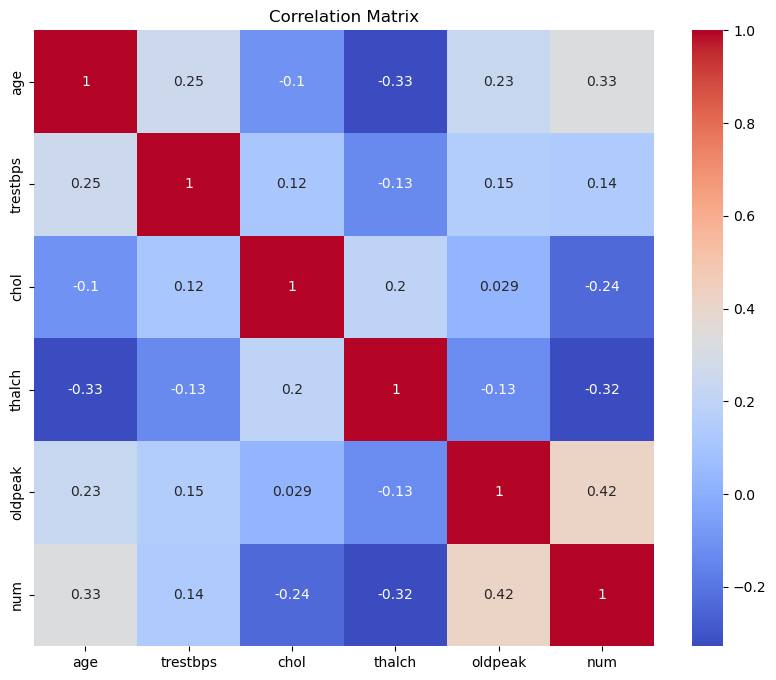

In [42]:
# Exploratory Data Analysis 
import matplotlib.pyplot as plt 
import seaborn as sns 

df.hist(figsize=(12,10))
plt.show()

df.plot(kind='box',subplots=True,layout=(3,4),figsize=(12,10))
plt.show()

correlation_matrix=df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()   

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
  if df[column].dtype == object:
    # Convert boolean values to strings before applying Label Encoding
    df[column] = df[column].astype(str)  # This line is added to fix the error
    df[column] = le.fit_transform(df[column])

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,1,2.3,0,0,0
1,41,1,1,135,203,False,1,132,1,0.0,1,0,0
2,57,1,0,140,192,False,1,148,1,0.4,1,0,0
3,52,1,3,118,186,False,0,190,1,0.0,1,0,0
4,57,1,0,110,201,False,1,126,3,1.5,1,0,0


In [45]:
Y=df['num']
X=df.iloc[:,0:12]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,True,0,150,1,2.3,0,0
1,41,1,1,135,203,False,1,132,1,0.0,1,0
2,57,1,0,140,192,False,1,148,1,0.4,1,0
3,52,1,3,118,186,False,0,190,1,0.0,1,0
4,57,1,0,110,201,False,1,126,3,1.5,1,0


In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (726, 12)
X_test shape: (182, 12)
Y_train shape: (726,)
Y_test shape: (182,)


In [47]:
# prompt: fit a model for the above training samples using decision tress classifier and calculate the training accuracy and test accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini',max_depth=9)


# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the training data
Y_train_pred = model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the testing data
Y_test_pred = model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8636363636363636
Testing Accuracy: 0.5604395604395604


In [48]:
from sklearn.metrics import accuracy_score
AS1=accuracy_score(Y_train,Y_train_pred)
AS2=accuracy_score(Y_test,Y_test_pred)
print("Training Accuracy Score:",AS1)
print("Test Accuracy Score:",AS2)

Training Accuracy Score: 0.8636363636363636
Test Accuracy Score: 0.5604395604395604


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

# Calculate the accuracy for the test data
accuracy = accuracy_score(Y_test, Y_test_pred)

# Calculate the precision for the test data
precision = precision_score(Y_test, Y_test_pred, average='weighted')

# Calculate the recall for the test data
recall = recall_score(Y_test, Y_test_pred, average='weighted')

# Calculate the F1-score for the test data
f1 = f1_score(Y_test, Y_test_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.5604395604395604
Precision: 0.5471523355350849
Recall: 0.5604395604395604
F1-Score: 0.5531662117315536


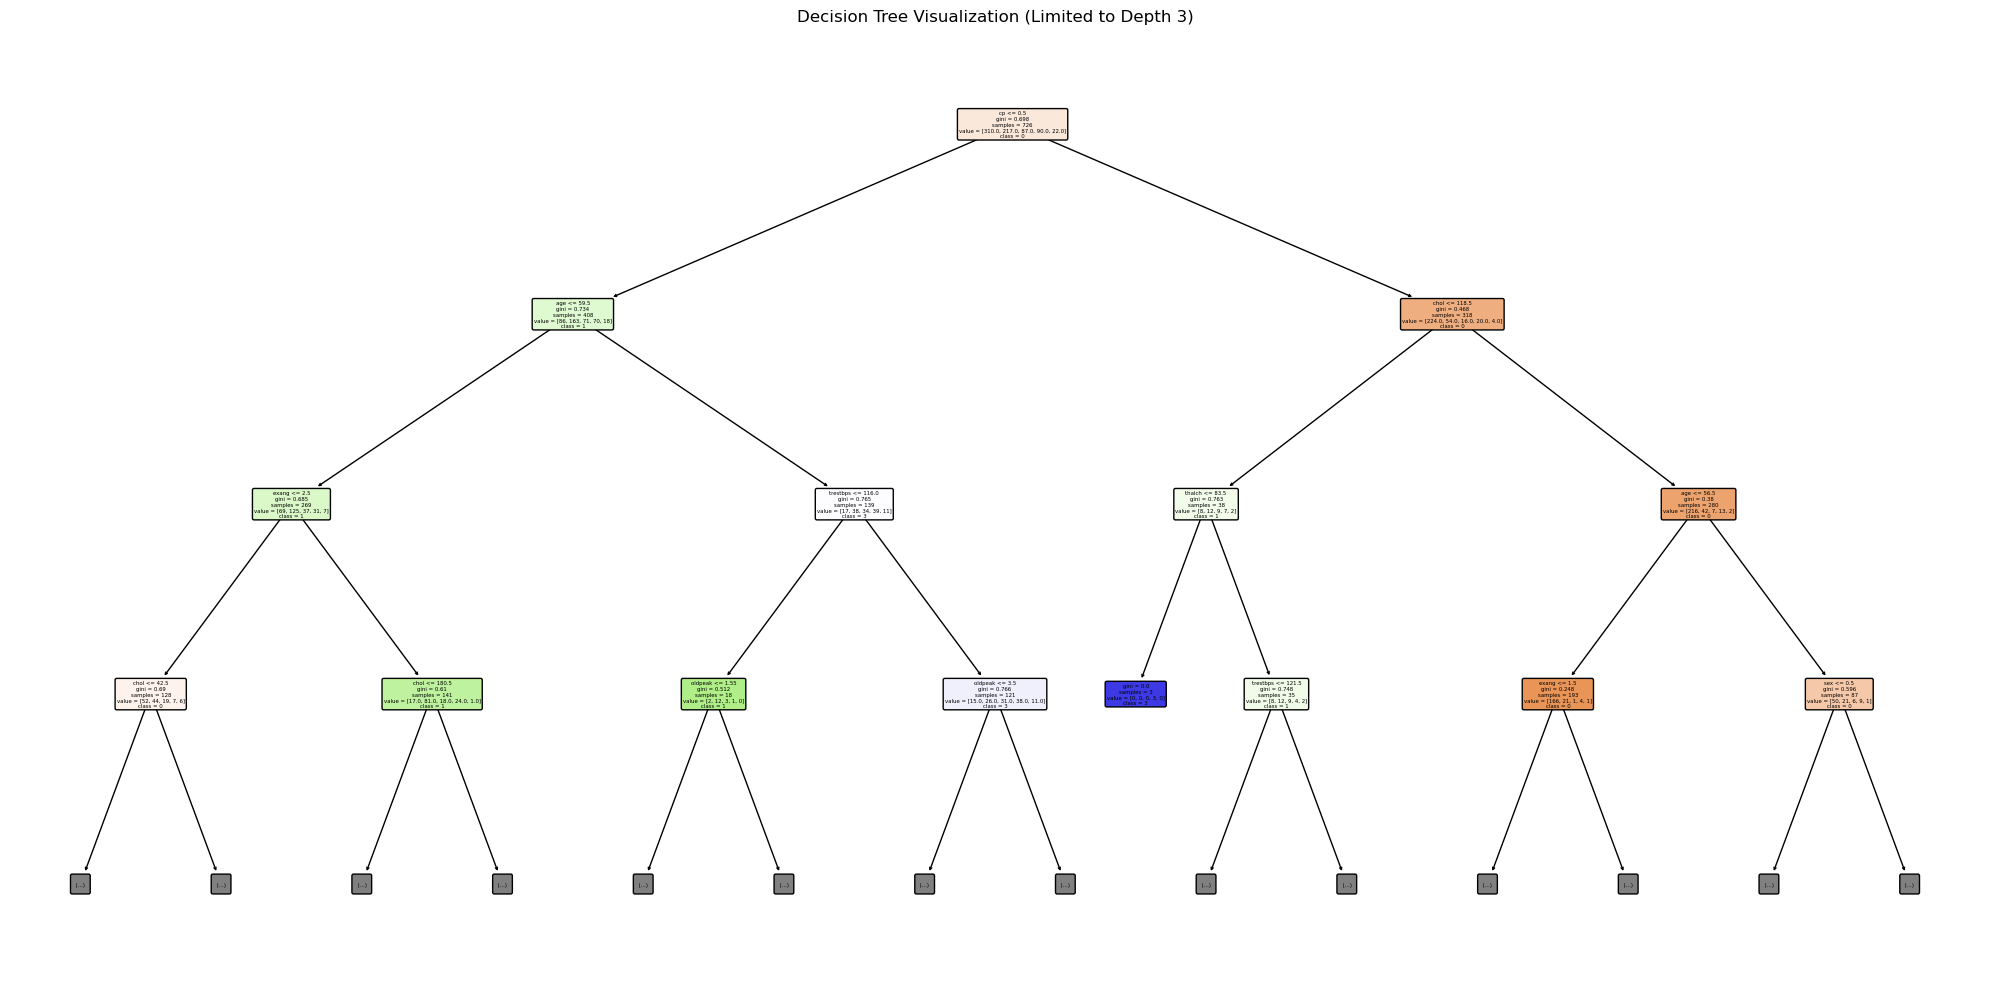

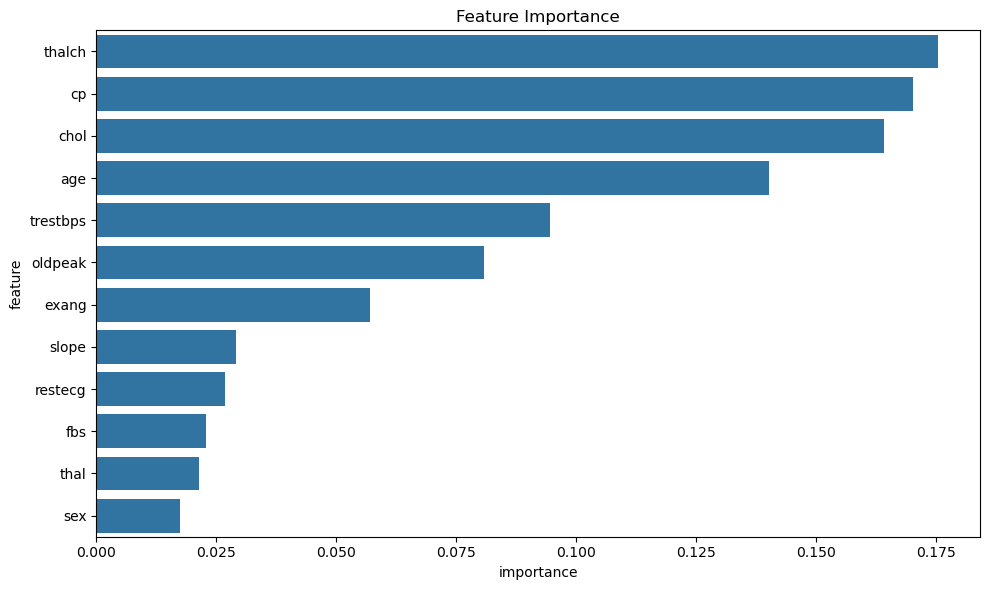

In [65]:
# Visualize the decision tree
from sklearn.tree import plot_tree 
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'], filled=True, rounded=True, max_depth=3)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.tight_layout()
plt.savefig('decision_tree_visualization.png')
plt.show()

# Visualize feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance_visualization.png')
plt.show()
